In [1]:
from local_search_solver import swap_elements, solve, get_distances_to_point
from utils import Point
import matplotlib.pyplot as plt

1060


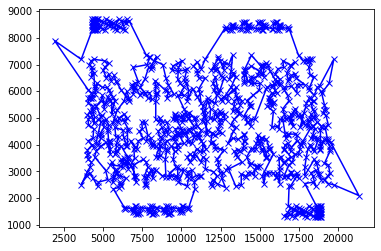

In [15]:
with open("data/tsp_1060_1") as f:
    input_data = f.read()
    
lines = input_data.split('\n')

nodeCount = int(lines[0])

points = []
for i in range(1, nodeCount+1):
    line = lines[i]
    parts = line.split()
    points.append(Point(float(parts[0]), float(parts[1])))
print(len(points))

plt.plot([point.x for point in points], [point.y for point in points], 'xb-')

In [16]:
import numpy as np
import multiprocessing as mp
from typing import Tuple, List
def compute_distance(i: Point, j: Point):
    return np.sqrt((i.x - j.x)**2 + (i.y - j.y)**2)


def compute_distances(start: int, dim: int, points: List[Point]) -> np.array:
    distances = np.zeros(dim - (start + 1))
    for later_point in range(start + 1, dim):
        distances[later_point - (start + 1)] = compute_distance(points[start], points[later_point])
    return distances

def get_distance(i: int, j: int, distances: List[np.array]) -> float:
    sorted_indices = sorted([i, j])
    print(sorted_indices)
    return distances[sorted_indices[0]][sorted_indices[1] - (sorted_indices[0] + 1)]

In [17]:
np.concatenate((np.array([1,2.0,3]), np.array([4,5,6])))

array([1., 2., 3., 4., 5., 6.])

In [18]:
pool = mp.Pool(mp.cpu_count())
dim = len(points)
results = [pool.apply(compute_distances, args=(start, dim, points)) for start in range(dim - 1)]
pool.close()


import sys
print(sys.getsizeof(results))
distance_matrix = np.zeros((dim, dim))
print(sys.getsizeof(distance_matrix))

first_part, second_part = get_distances_to_point(4, results)
np.concatenate((first_part, second_part))



           
#     for i in range(dim):
#         for j in range(i + 1, dim):
#             d = compute_distance(points[i], points[j])
#             distance_matrix[i, j] = d
#             distance_matrix[j, i] = d


9032
8988912


ValueError: too many values to unpack (expected 2)

In [49]:
import pickle as pk
with open('list_of_arrays.Pickle', 'wb') as f:
    pk.dump(results, f)
with open('matrix_array.Pickle', 'wb') as f:
    pk.dump(distance_matrix, f)

In [25]:
print(len(results[0]), len(results[1]), len(results[-2]))

1084 1083 2


In [28]:
results[-4]

array([7697.24756   , 7513.05636875, 7726.45973263,    0.        ])

number of points is: 1060
neighbors computed.
New best path distance: 255911.17
New best path distance: 250926.49
New best path distance: 250696.49
New best path distance: 245633.41
[178, 188, 187, 186, 185, 184, 183, 182, 181, 174, 173, 159, 158, 157, 156, 155, 154, 151, 150, 149, 145, 146, 148, 147, 142, 141, 143, 144, 153, 152, 140, 139, 138, 137, 136, 133, 132, 131, 130, 129, 127, 134, 135, 126, 125, 124, 128, 123, 122, 121, 120, 119, 118, 117, 116, 115, 114, 113, 112, 111, 110, 109, 108, 107, 106, 105, 104, 103, 102, 101, 100, 99, 98, 96, 97, 95, 94, 92, 91, 90, 89, 88, 93, 87, 86, 85, 84, 83, 82, 81, 80, 79, 75, 77, 78, 76, 73, 74, 72, 71, 70, 972, 973, 974, 69, 68, 975, 980, 981, 979, 978, 976, 977, 971, 970, 969, 968, 967, 966, 965, 963, 964, 962, 961, 960, 958, 957, 959, 956, 955, 954, 953, 952, 951, 950, 949, 948, 947, 946, 945, 943, 944, 942, 941, 940, 939, 938, 937, 936, 935, 934, 933, 932, 931, 930, 929, 928, 927, 926, 925, 924, 923, 922, 921, 920, 919, 918, 917, 916, 915,

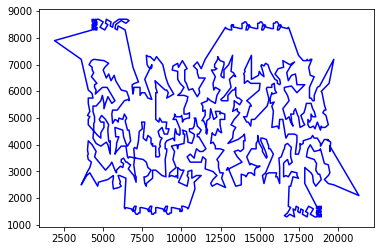

In [20]:
best_path, distance_best_path, best_distances = solve(points)
print(best_path)
plt.plot([points[i].x for i in best_path] + [points[best_path[0]].x], [points[i].y for i in best_path] + [points[best_path[0]].y], 'b-')

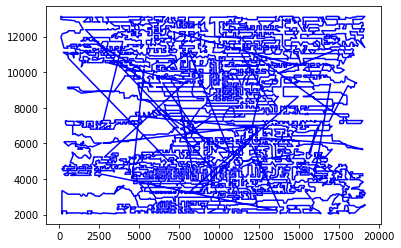

In [11]:
plt.plot([points[i].x for i in best_path] + [points[best_path[0]].x], [points[i].y for i in best_path] + [points[best_path[0]].y], 'b-')

counter = 1000
counter = 2000
counter = 3000
counter = 4000
counter = 5000
counter = 6000
counter = 7000
counter = 8000
counter = 9000
[25, 83, 32, 4, 45, 27, 1, 2, 28, 16, 77, 42, 7, 0, 36, 58, 56, 6, 69, 61, 76, 35, 84, 94, 40, 47, 72, 51, 93, 99, 22, 18, 19, 71, 43, 65, 37, 13, 89, 3, 33, 59, 39, 48, 85, 87, 73, 67, 66, 64, 60, 81, 96, 57, 41, 50, 12, 55, 98, 97, 49, 20, 90, 63, 78, 95, 52, 92, 21, 70, 23, 8, 34, 17, 79, 88, 86, 54, 24, 68, 53, 14, 15, 75, 46, 5, 91, 38, 80, 29, 30, 74, 10, 11, 9, 26, 31, 44, 62, 82]


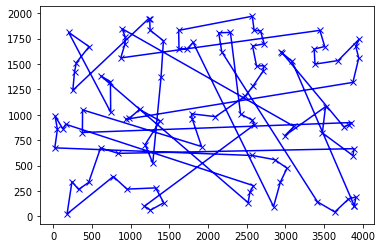

In [3]:
best_path, distance_best_path, best_distances = solve(points)
print(best_path)
plt.plot([points[i].x for i in best_path] + [points[best_path[0]].x], [points[i].y for i in best_path] + [points[best_path[0]].y], 'xb-')

[83, 92, 52, 95, 78, 49, 97, 20, 90, 63, 27, 45, 1, 54, 86, 25, 82, 62, 44, 31, 13, 89, 3, 17, 34, 38, 91, 57, 41, 6, 56, 58, 69, 18, 22, 99, 93, 51, 8, 23, 70, 21, 66, 64, 60, 81, 96, 28, 2, 33, 59, 39, 98, 55, 12, 50, 16, 77, 42, 7, 10, 74, 30, 0, 36, 61, 76, 35, 84, 48, 85, 87, 73, 67, 43, 37, 65, 71, 19, 24, 68, 15, 14, 75, 53, 46, 5, 29, 80, 11, 9, 26, 72, 47, 40, 94, 79, 88, 4, 32]


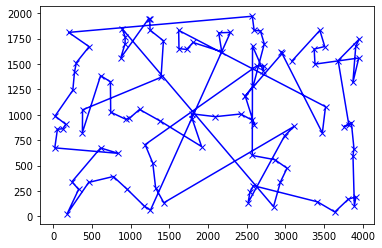

In [3]:
best_path, distance_best_path, best_distances = solve(points)
print(best_path)
plt.plot([points[i].x for i in best_path] + [points[0].x], [points[i].y for i in best_path] + [points[0].y], 'xb-')

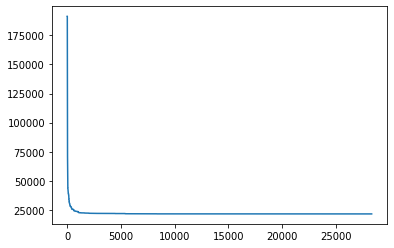

In [4]:
plt.plot([i for i in range(len(best_distances))], best_distances)

In [8]:
a = set([3,2,1])
a | {4}
a

{1, 2, 3}

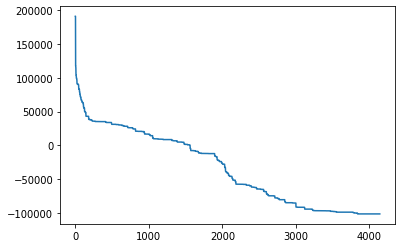

In [4]:
plt.plot([i for i in range(len(best_distances))], best_distances)

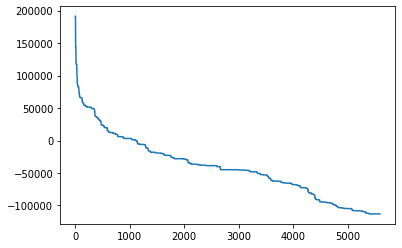

In [5]:
plt.plot([i for i in range(len(best_distances))], best_distances)

In [6]:
best_distances[-1]

19449.039769567436

In [4]:
best_distances[-1]

-112997.20499792784